# **Week 2. Supervised Learning**

2주차 과제는 지도학습의 회귀, 분류 모델을 학습-평가하는 과정을 간소하게 재현한 코드입니다.

1. 적힌 코드를 따라가며, 배운 내용과 어떻게 연관되는지 등을 생각하거나 찾아본 후, 주석으로 달아주시면 좋을 것 같습니다.
2. 더불어 생각해볼 만한 질문들을 중간에 달아두었으니, 이에 대한 고민과 답변을 작성해주시면 됩니다.

# **1. 회귀 - with diabetes dataset**

In [1]:
# 필요한 라이브러리 불러오기
import numpy as np
import pandas as pd

# sklearn은 Scikit-learn 라이브러리
from sklearn.datasets import load_diabetes                # load_diabetes: 당뇨병 예제 데이터셋을 불러옴
from sklearn.model_selection import train_test_split      # train_test_split: 데이터를 학습용과 테스트용으로 나눔
from sklearn.preprocessing import StandardScaler          # StandardScaler: 데이터를 표준화하는데 사용
from sklearn.linear_model import LinearRegression         # LinearRegression: 선형 회귀 모델 구현
from sklearn.metrics import mean_squared_error, r2_score  # mean_squared_error, r2_score: 회귀 모델 성능 평가(MSE, 결정계수)

import seaborn as sns
import matplotlib.pyplot as plt

## 1. 데이터 로드 및 탐색

In [2]:
diabetes = load_diabetes()
X, y = diabetes.data, diabetes.target     # .data: 특징(특성, 독립) 변수들 값 & .target: 목표 변수(타겟) 값
feature_names = diabetes.feature_names    # .feature_names: 특징 변수의 이름 목록

In [ ]:
# 데이터 크기와 피처(특성) 정보 출력
print(f"Dataset Shape: {X.shape}")  # (442, 10)
print(f"Feature Names: {diabetes.feature_names}")
print(f"Target (y) Sample: {y[:5]}")  # 타겟 값 일부 확인

Dataset Shape: (442, 10)
Feature Names: ['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']
Target (y) Sample: [151.  75. 141. 206. 135.]


In [3]:
# 데이터프레임으로 변환하여 탐색
df = pd.DataFrame(X, columns=feature_names)     # columns=feature_names로 df의 열 이름 설정(미설정 시, 0, 1,  ... 9로 지정됨)
df['target'] = y

In [ ]:
df.info() # df에는 총 442개의 행, 11개의 열

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
 10  target  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB


In [ ]:
df.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,-2.511817e-19,1.230790e-17,-2.245564e-16,-4.797570e-17,-1.381499e-17,3.918434e-17,-5.777179e-18,-9.042540e-18,9.293722e-17,1.130318e-17,152.133484
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,77.093005
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123988e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260971e-01,-1.377672e-01,25.000000
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665608e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324559e-02,-3.317903e-02,87.000000
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670422e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947171e-03,-1.077698e-03,140.500000
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564379e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243232e-02,2.791705e-02,211.500000
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320436e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335973e-01,1.356118e-01,346.000000


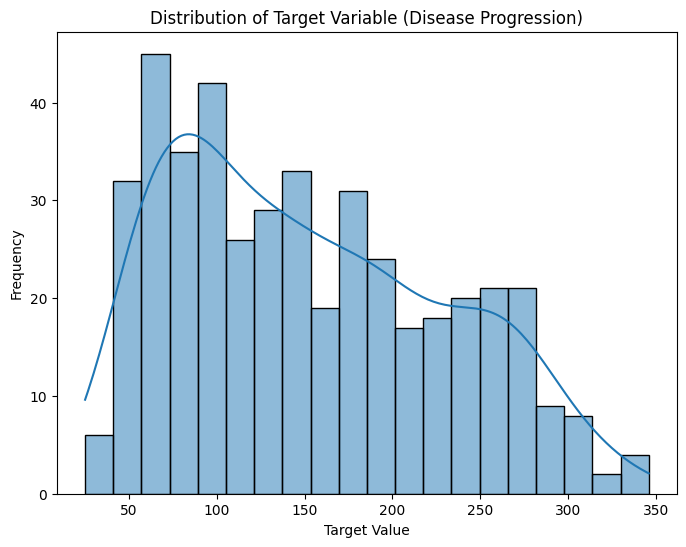

In [ ]:
# 히스토그램으로 타겟 값 분포 확인
# diabetes 데이터셋의 타겟은 '각 환자에 대한 당뇨병 진행 정도'로, 연속형 값임. 이 값이 클수록 당뇨병의 진행이 더 많이 일어난 것
plt.figure(figsize=(8, 6))
sns.histplot(df['target'], bins=20, kde=True)
plt.title("Distribution of Target Variable (Disease Progression)")
plt.xlabel("Target Value")
plt.ylabel("Frequency")
plt.show()

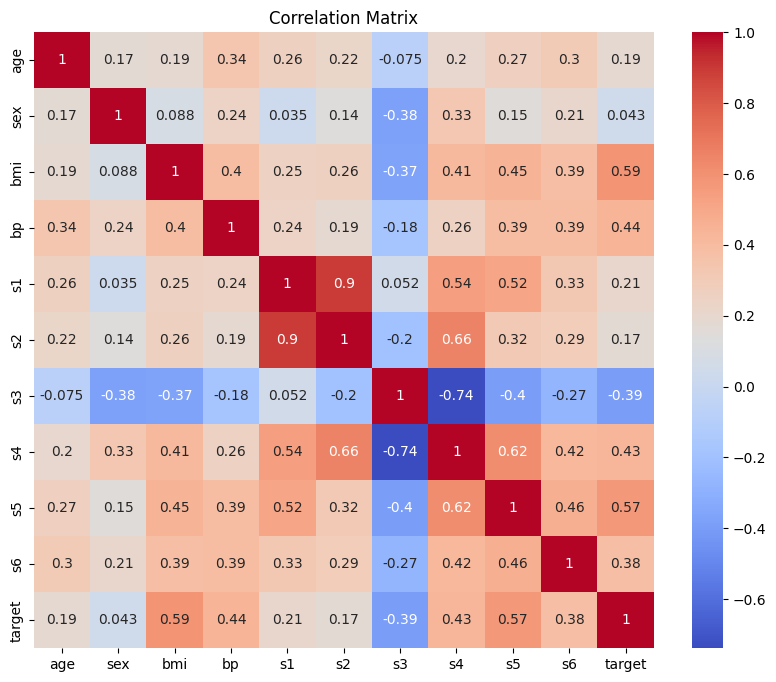

In [ ]:
# 상관 행렬 및 히트맵 시각화
plt.figure(figsize=(10, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')    # annot은 각 셀에 값 표시할지 여부
plt.title("Correlation Matrix")
plt.show()

In [4]:
# Q1-1: 어떤 피처(특성)가 가장 중요한지, 직접 데이터를 분석해보세요.
# 선형 회귀 모델의 회귀 계수로 피처의 중요성을 파악
model = LinearRegression()    # 모델 초기화
model.fit(X, y)               # 간단한 확인 목적이고, 아래에서 데이터 분할 후 선형 회귀 모델 적합을 하는 것 같아 우선은 간단하게 X와 y를 이용해 모델을 학습시켜보았습니다.
print(model.coef_)            # 회귀계수의 절대값이 큰 s1(-792.17563855), s5(751.27369956) 피처가 중요해보인다.

# Q1-2: 어떤 피처가 'target'과 가장 높은 상관관계를 가지나요?
# bmi가 0.59로 target과 가장 높은 상관관계를 지닌다.

[ -10.0098663  -239.81564367  519.84592005  324.3846455  -792.17563855
  476.73902101  101.04326794  177.06323767  751.27369956   67.62669218]


## 2. 데이터 전처리: 데이터 분할 및 스케일링


In [5]:
# 훈련 데이터와 테스트 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# train_test_split(X, y, test_size=0.2, random_state=42)에서
# test_size = 0.2 -> 데이터의 20%는 test data, 나머지 80%는 train data
# random_state = 42 -> 데이터 분할을 위한 랜덤 시드 값, 재현 가능성을 위해 사용

In [ ]:
# Q2: 데이터 분할 비율을 70:30 또는 90:10으로 변경하면 결과는 어떻게 달라질까요?
# 70:30 -> train data가 줄어듦 / test data가 늘어남 -> 모델이 잘 학습하지 못해 underfitting 발생 가능 / 모델의 성능 평가에 대한 신뢰성 증가
# 90:10 -> train data가 늘어남 / test data가 줄어듦 -> 모델이 복잡해지고 overfitting 발생 가능 / 모델의 성능 평가에 대한 신뢰성 감소

In [10]:
# 스케일링(표준화)
scaler = StandardScaler() # StandardScaler 객체를 생성(표준화 도구)
X_train = scaler.fit_transform(X_train) # fit_transform은 fit과 transform 과정을 한 번에 수행 ->
                                        # 학습 데이터를 활용해 변환에 필요한 정보인 평균과 표준편차를 계산하여 scaler 객체에 저장(scaler.fit)
                                        # fit에서 학습된 정보를 사용하여 X_train 데이터를 정규화(scaler.transform)
X_test = scaler.transform(X_test)       # test data(X_test)에 대해서는 fit을 새로 적용하지 않음. X_train을 이용해 계산한 것과 동일한 평균과 표준편차를 이용해 정규화
                                        # test data는 train data에서 계산된 정보를 사용해 변환해야 함.

In [8]:
# Q3: 스케일링을 하지 않고 학습하면 어떤 결과가 나올까요? 한 번 실험해 보세요.

# X_train, X_test, y_train, y_test 재설정
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Q3-(1). 스케일링을 하지 않는다면?
model = LinearRegression()
model.fit(X_train, y_train)
print("스케일링을 하지 않았을 때의 계수:", model.coef_)

# Q3-(2). 스케일링을 한다면?
scaler = StandardScaler()
X_scaled_train = scaler.fit_transform(X_train)
X_scaled_test = scaler.transform(X_test)

model_scaled = LinearRegression()
model_scaled.fit(X_scaled_train, y_train)
print("스케일링을 했을 때의 계수:", model_scaled.coef_)

# 스케일링을 하지 않았을 때, 다른 계수들에 비해 너무 크거나 너무 작은 값을 갖는 계수들이 존재함을 알 수 있다.
# 스케일링을 한 후 회귀 모델을 적합했을 때는 계수들이 대체로 비슷한 스케일의 값들을 갖는다.
# 즉, 스케일링을 하지 않고 모델을 적합한다면 각 변수의 중요도가 과소평가 되거나 과대평가 되는 등 왜곡될 수 있다.

스케일링을 하지 않았을 때의 계수: [  37.90402135 -241.96436231  542.42875852  347.70384391 -931.48884588
  518.06227698  163.41998299  275.31790158  736.1988589    48.67065743]
스케일링을 했을 때의 계수: [  1.75375799 -11.51180908  25.60712144  16.82887167 -44.44885564
  24.64095356   7.67697768  13.1387839   35.16119521   2.35136365]


## 3. 모델 적합 (선형 회귀)

In [11]:
model = LinearRegression()
model.fit(X_train, y_train)  # 학습 진행

# 모델의 가중치 출력
print("Model Coefficients:", model.coef_)
print("Model Intercept:", model.intercept_)

Model Coefficients: [  1.75375799 -11.51180908  25.60712144  16.82887167 -44.44885564
  24.64095356   7.67697768  13.1387839   35.16119521   2.35136365]
Model Intercept: 153.73654390934846


In [ ]:
# Q4: 모델의 계수를 분석해보세요. 어떤 피처가 타겟에 가장 큰 영향을 미치는지 확인하세요.

# s1 피처의 계수가 -44.44885564로 타겟에 가장 큰 영향을 미친다.
# 스케일링 된 s1이 1 증가하면 타겟이 -44.44885564 감소한다.

In [12]:
# 테스트 데이터로 예측
y_pred = model.predict(X_test)

## 4. 모델 평가 Evaluation

In [13]:
# 모델 평가

mse = mean_squared_error(y_test, y_pred) # mean_squared_error(실제 타겟값, 예측값)
r2 = r2_score(y_test, y_pred) # r2_score(실제 타겟값, 예측값)

print(f"Mean Squared Error (MSE): {mse:.2f}") # ':.2f'는 포맷 지정자 -> 주어진 값을 소수점 둘째 자리까지 포맷팅
print(f"R² Score: {r2:.2f}")                 # .은 소수점 이하를 지정 / 2는 소수점 이하 자리수 / f는 고정 소수점 형식

Mean Squared Error (MSE): 2900.19
R² Score: 0.45


In [ ]:
# (선택) Q5: MSE가 높거나 R² 점수가 낮다면, 데이터를 더 분석하거나 다른 모델을 시도해보세요.
# (선택) Q6: 선형 회귀 외에 Decision Tree, Random Forest를 사용해 결과를 비교해보세요.

# 2. **분류 - with Iris dataset**

In [14]:
# 필요한 라이브러리 불러오기
from sklearn.datasets import load_iris                               # iris 데이터셋 불러오기
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC                                          # SVM 알고리즘을 구현한 Support Vector Classifier -> 분류 문제에서 데이터 포인트를 분리하는 초평면을 찾는데 사용
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# accuracy_score: 분류 모델의 정확도 계산 - 전체 데이터 중 올바르게 분류된 비율
# classification_report: 분류 모델의 성능을 평가하기 위한 보고서 생성 - Precision, Recall, F1-score, Support(각 클래스에 속하는 샘플 수) 포함
# confusion_matrix: 혼동행렬 생성(행은 실제 클래스, 열은 예측 클래스) - 클래스별 예측 결과 요약

## 1. 데이터 로드 및 탐색

In [18]:
iris = load_iris()
X, y = iris.data, iris.target # iris 데이터셋에서의 타겟은 '각 샘플(꽃)이 속한 클래스(품종)' - 0, 1, 2로 구성된 정수형 배열
                              # 0은 setosa, 1은 versicolor, 2는 virginica를 나타내는 정수형 레이블
feature_names = iris.feature_names
class_names = iris.target_names

In [16]:
# 데이터 크기와 피처 정보 출력
print(f"Dataset Shape: {X.shape}")  # (샘플 수, 피쳐 수)
print(f"Feature Names: {iris.feature_names}")
print(f"Classes: {iris.target_names}")  # 클래스가 몇 개이고, 어떤 게 있는지 확인해 보세요
                                        # 클래스는 총 3개이며, 'setosa', 'versicolor', 'virginica'가 있음
print(f"First 5 Samples:\n{X[:5]}") # X(iris.data)는 2차원 배열 형태이므로 [:5]로 슬라이싱

Dataset Shape: (150, 4)
Feature Names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Classes: ['setosa' 'versicolor' 'virginica']
First 5 Samples:
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


In [19]:
# Q1: 각 클래스에 몇 개의 데이터가 있는지 확인해 보세요. 클래스 별 데이터가 균등하게 분포되어 있나요?
unique, counts = np.unique(y, return_counts=True)
# np.uniqe()는 배열의 고유한 값 추출, return_counts=True로 각 고유값의 빈도수도 함께 반환
# -> unique에는 클래스 레이블인 0, 1, 2가 저장 / counts에는 각 클래스별 샘플 개수가 저장

class_distribution = {int(k): int(v) for k, v in zip(unique, counts)} # 딕셔너리 컴프리헨션
print(f"Class Distribution: {class_distribution}")

# 각 클래스에는 데이터가 모두 50개씩 균등하게 분포되어 있다.

Class Distribution: {0: 50, 1: 50, 2: 50}


In [20]:
# 데이터프레임으로 변환하여 탐색
df = pd.DataFrame(X, columns=feature_names)
df['class'] = y

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   class              150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [22]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


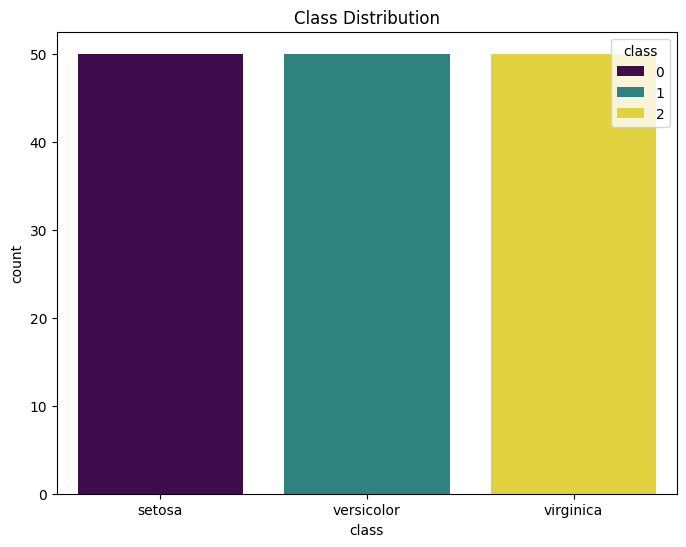

In [23]:
# 클래스별 데이터 분포 확인
plt.figure(figsize=(8, 6))
sns.countplot(x='class', data=df, palette='viridis', hue='class') # 범주형 데이터의 각 카테고리별 빈도수를 막대그래프로 표현
# x='class' -> class 열의 데이터를 x축에 사용 / hue='class' -> class별로 색상을 다르게 표현
plt.title("Class Distribution")
plt.xticks(ticks=[0, 1, 2], labels=class_names)
plt.show()

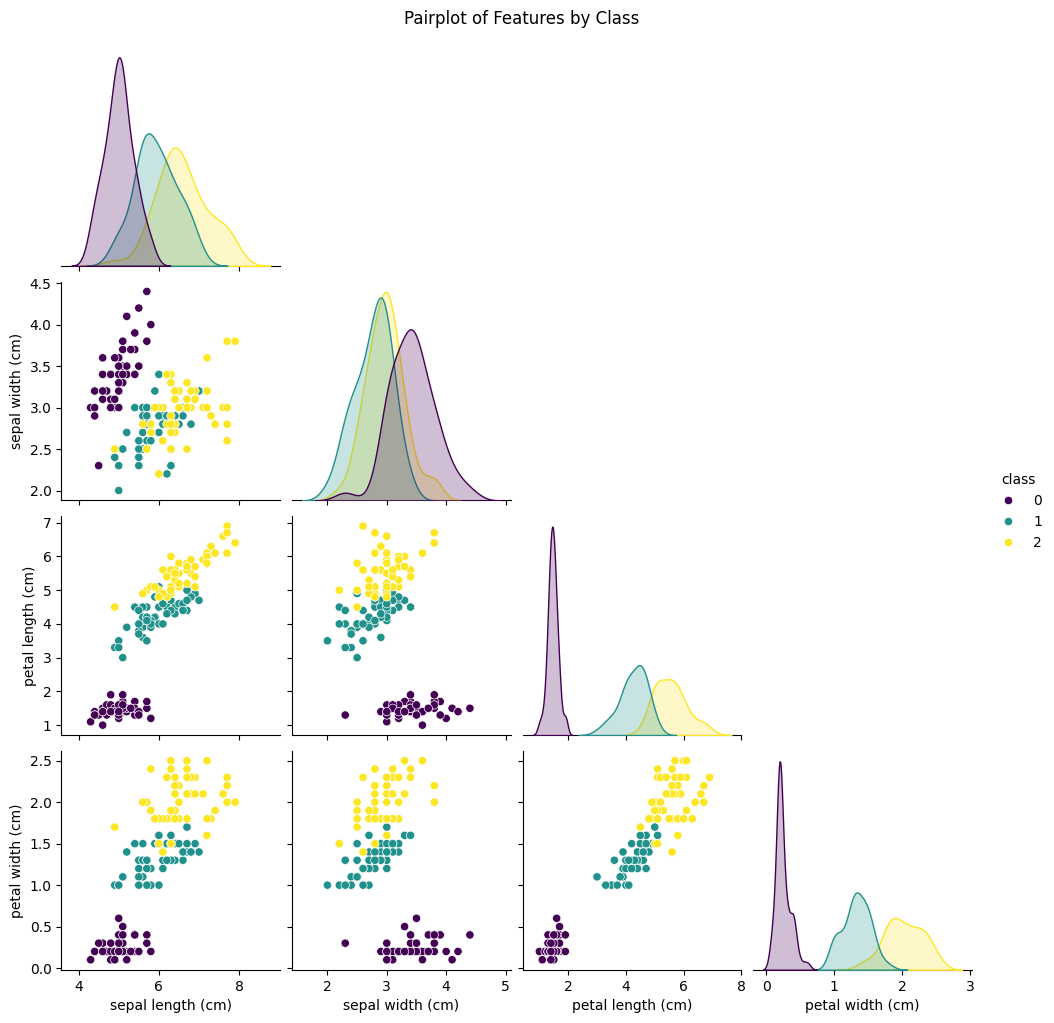

In [24]:
# 피처 간 산점도 행렬
sns.pairplot(df, hue='class', palette='viridis', diag_kind='kde', corner=True)
plt.suptitle("Pairplot of Features by Class", y=1.02)
plt.show()

## 2. 데이터 전처리: 데이터 분할 및 스케일링

In [41]:
# 훈련 데이터와 테스트 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
# stratify = y -> y 클래스의 비율에 따른 계층적 샘플링

In [42]:
# Q2: stratify를 제외하면 클래스 비율이 어떻게 달라질까요? 확인해 보세요.

# (1) stratify = y 설정을 했을 때
unique, counts = np.unique(y_train, return_counts=True)
class_distribution = {int(k): int(v) for k, v in zip(unique, counts)}
print(f"Class Distribution(with stratify): {class_distribution}")

# (2) stratify = y 설정을 하지 않았을 때
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
unique, counts = np.unique(y_train, return_counts=True)
class_distribution = {int(k): int(v) for k, v in zip(unique, counts)}
print(f"Class Distribution(without stratify): {class_distribution}")

# iris 데이터셋에서 각 클래스의 비율이 1:1:1이기 때문에 stratify를 포함했을 때는 각 클래스가 모두 40개씩 동일하게 추출된다.
# 그러나 stratify를 제외하면 클래스의 비율을 고려하지 않고 무작위로 추출되므로 기존 클래스의 비율이 유지되지 않는다. -> 비계층적 샘플링
# 클래스가 1인 샘플이 가장 많이 추출되었고 클래스가 2인 샘플이 가장 적게 추출되었다.

Class Distribution(with stratify): {0: 40, 1: 40, 2: 40}
Class Distribution(without stratify): {0: 40, 1: 41, 2: 39}


In [43]:
# 훈련 데이터와 테스트 데이터 다시 계층적 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 스케일링(표준화)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Q3: 스케일링을 하지 않고 학습하면 정확도에 어떤 영향을 미칠까요?
# 스케일링을 하지 않는다면 각 피처의 영향력이 왜곡되게 해석될 수 있다.
# 어떤 피처가 실제로는 타겟에 큰 영향을 주지 않는데 일반적으로 큰 값을 가지는 변수라면 그 피처의 영향력이 과대평가 될 수 있는 것이다.

# 챗GPT를 이용한 학습
# 특히 SVM은 각 데이터 포인트의 거리를 기반으로 최적의 경계인 초평면을 찾아 데이터를 분리하는 방식이므로,
# 만약 각 특성의 스케일이 동일하지 않다면 유클리드 거리를 계산할 때 경계가 왜곡되어 예측 정확도가 떨어질 수 있다.
# 또한 SVM에서는 경사 하강법을 사용해서 최적화 과정을 진행하는데, 만약 피처 간의 스케일이 다르다면 각 피처의 수렴 속도가 달라져 비효율적인 학습이 발생할 수 있다.
# * 경사하강법: Loss Function이 최소가 되도록 parameter를 점진적으로 업데이트하여 모델 학습을 최적화하는 방법

## 3. 모델 적합 (SVM)

In [44]:
model = SVC(kernel='linear', C=0.1)  # 선형 커널 사용
# SVC: SVM 모델을 분류 문제에 사용
# kernel = 'linear': SVM 모델의 결정 경계를 선형 커널로 설정하여 데이터를 선형적으로 분리
# C = 0.1: C는 정규화 파라미터로, 과적합을 방지하는 역할. 마진을 최대화(모델이 일반화됨)하면서 train set에서의 오류를 얼마나 허용할지를 결정.
# SVC(kernel='linear', C=0.1)로 train set에서 선형 결정 경계를 찾아 클래스를 분리
model.fit(X_train, y_train) # 모델 학습

SVC(C=0.1, kernel='linear')

In [37]:
# Q4: C 값을 조정해보세요 (예: 0.1, 10). 모델의 성능에 어떤 영향을 미칠까요?
# C는 오차 허용 범위와 마진 크기 사이에서 트레이드오프를 설정
# C가 작은 값 -> 큰 마진을 허용 & 오차를 더 많이 허용 -> 과소적합 발생 but 더 일반화된 모델
# C가 큰 값 -> 작은 마진을 허용 & 오차를 더 적게 허용 -> 모델이 복잡해지고 과적합 발생
# 즉, C가 커질수록 새로운 데이터에 대한 예측 및 일반화 성능이 떨어질 수 있으며, C가 작아질수록 train set에 대한 분류 성능이 떨어질 수 있다.

In [45]:
# 테스트 데이터로 예측
y_pred = model.predict(X_test)

## 4. 모델 평가 Evaluation

In [46]:
# 모델 평가
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=iris.target_names))  # classification_report(실제 타겟값, 모델 예측값)

Accuracy: 0.93

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.90      0.90      0.90        10
   virginica       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



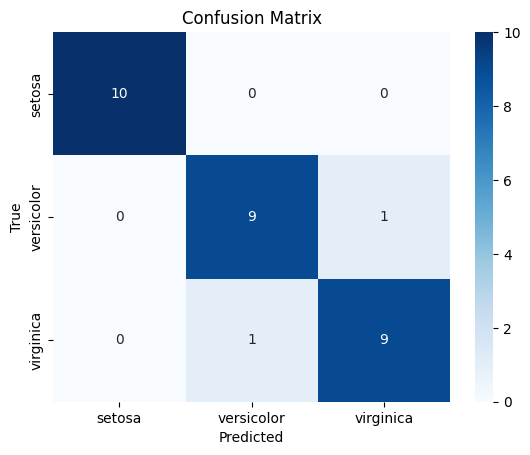

In [49]:
# Confusion Matrix 시각화
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
# Q6: Confusion Matrix를 보고 결과를 해석해보세요.
# 실제로 setosa인 샘플 10개 중에서 setosa로 정확히 예측된 샘플은 10개이다.
# 실제로 versicolor인 샘플 10개 중에서 versicolor로 정확히 예측된 샘플은 9개이다.
# 실제로 versicolor인 샘플 10개 중에서 virginica로 잘못 예측된 샘플은 1개이다.
# 실제로 virginica인 샘플 10개 중에서 versicolor로 잘못 예측된 샘플은 1개이다.
# 실제로 virginica인 샘플 10개 중에서 virginica로 정확히 예측된 샘플은 9개이다.

# 즉, 모델의 성능은 대체로 좋은 편이며, 실제로 versicolor인 샘플 한 개와 virginica인 샘플 한 개에 대해서만 분류를 잘못 하였다.